 Import Statments

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt

Defining The file path

In [10]:
file_path = "D:/Desktop/Data_folder/data/benin-malanville.csv"

## Loading The Data

In [17]:
benin_df = pd.read_csv(file_path)

## Data Cleaning

<Axes: >

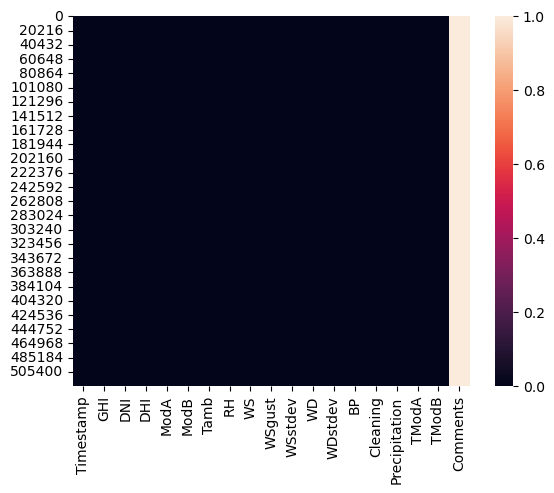

In [18]:
sns.heatmap(benin_df.isnull())

As we can see from the above heatmap the "comments" column contains null values in all rows so there is no harm in dropping the column

In [19]:
benin_df = benin_df.drop(columns=['Comments'])

 Describe the data type of the column

In [21]:
benin_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

from their data type we can see that all are numbers except the timestap which is an object

## Descriptive Statistics


In [22]:
benin_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


classify the columns in to three different lists

In [29]:
catagory_col = ["Timestamp","Cleaning"]
numeric_col = [col for col in benin_df.columns if col not in catagory_col ]
target_col = ["ModA","ModB"]

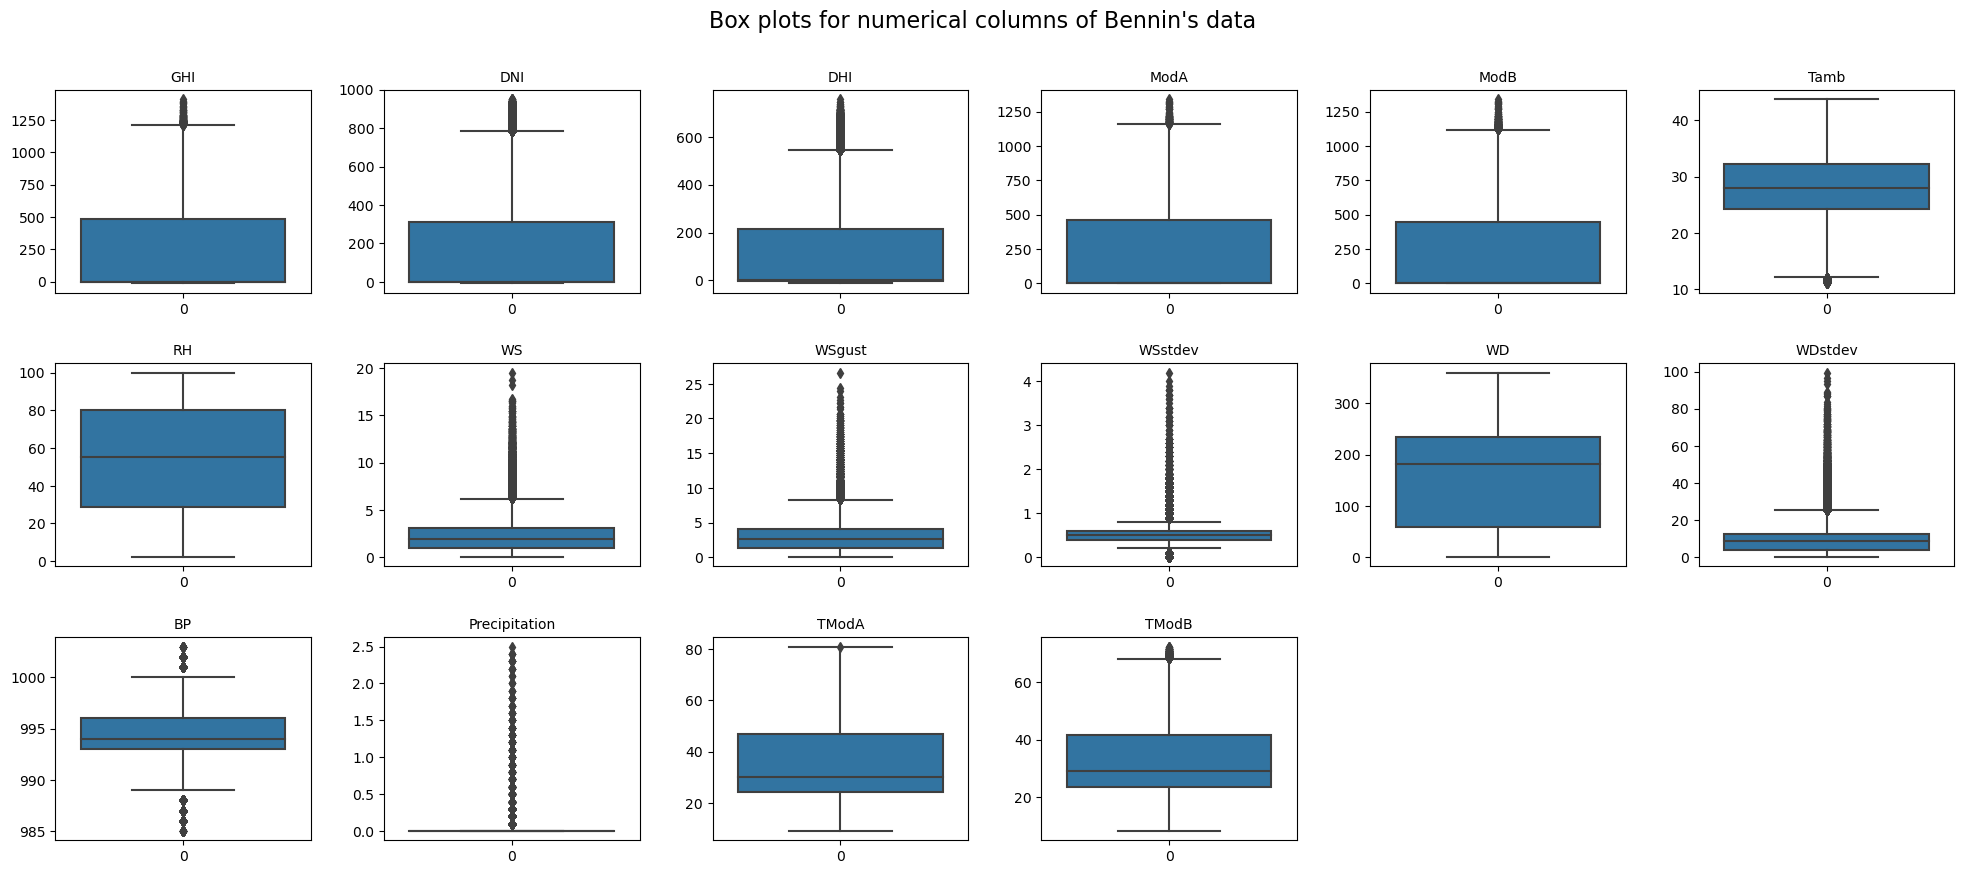

In [34]:
# Define the maximum number of columns per row
MAX_COLUMNS = 6

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(numeric_col) / MAX_COLUMNS)

# Create a figure with a larger size
fig = plt.figure(figsize=(20, 3 * num_rows))
fig.suptitle("Box plots for numerical columns of Bennin's data", fontsize=16)

# Loop through each column and create a subplot
for idx, col_name in enumerate(numeric_col):
    if col_name in benin_df.columns:
        # Calculate row and column for the subplot
        row = idx // MAX_COLUMNS
        col = idx % MAX_COLUMNS
        
        # Create a subplot for each box plot
        ax = plt.subplot(num_rows, MAX_COLUMNS, idx + 1)  # (num_rows, MAX_COLUMNS, position)
        
        # Plot the boxplot for the column
        sns.boxplot(data=benin_df[col_name].astype(float), ax=ax, orient='v')
        
        # Set the title for each subplot (optional)
        ax.set_title(f'{col_name}', fontsize=10)
        
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Adjust the layout to ensure there is no overlap
plt.tight_layout(pad=2)

# Show the figure with all the box plots
plt.show()

### Based on the box plots, it is evident that the distributions of our variables do not follow a normal pattern. In fact, most of the variables exhibit a right-skewed distribution. Additionally, all variables contain outliers that require attention and further handling.

## Removing Outliers

In [47]:
lower_limit = 1.5
upper_limit = 1.5

# Calculate the number of rows before removing outliers
initial_data_points = benin_df[numeric_col].shape[0]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = benin_df[numeric_col].quantile(0.25)
Q3 = benin_df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Create masks for filtering out outliers based on IQR
lower_bound = Q1 - lower_limit * IQR
upper_bound = Q3 + upper_limit * IQR

# Create a mask to filter out outliers
outlier_mask = (benin_df[numeric_col] >= lower_bound) & (benin_df[numeric_col] <= upper_bound)

# Apply the mask to the dataframe
benin_df_filtered = benin_df[outlier_mask.all(axis=1)]

# Calculate the percentage of data removed
bennin_removed = 100 - ((benin_df_filtered.shape[0] / initial_data_points) * 100)

# Print the percentage of data removed
print(f"Removed {benin_removed:.2f}% of data from Bennin dataset")

Removed 4.61% of data from Bennin dataset


In [58]:
benin_df_filtered.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000,501367.000000
mean,211.999428,146.477047,105.357248,207.085630,200.594430,27.958907,55.509986,2.058663,2.726952,0.463886,154.035608,8.349715,994.167227,0.000963,0.001997,34.171361,31.683859
std,310.122338,239.624046,148.772346,303.245692,294.078114,5.901380,27.862370,1.583631,2.005207,0.271494,103.025069,6.317666,2.479979,0.031023,0.037999,14.186595,11.959278
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,12.100000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.600000,8.800000
25%,-2.100000,-0.500000,-2.200000,0.000000,0.000000,24.000000,30.200000,0.900000,1.300000,0.400000,57.200000,3.400000,993.000000,0.000000,0.000000,24.000000,23.400000
50%,-0.800000,-0.200000,-0.800000,0.400000,0.300000,27.700000,56.400000,1.900000,2.400000,0.400000,184.900000,8.400000,994.000000,0.000000,0.000000,29.200000,28.300000
75%,399.200000,257.900000,209.000000,378.100000,365.400000,32.000000,81.200000,3.000000,3.900000,0.600000,235.400000,12.100000,996.000000,0.000000,0.000000,44.400000,39.900000
max,1211.000000,786.200000,543.900000,1149.200000,1119.000000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


The data reveals that the "GHI," "DNI," and "DHI" columns contain both negative and positive values. These negative readings could arise from various factors, but to pinpoint the cause, we need to analyze the times at which these negative values occur. If the negative readings are primarily recorded during nighttime, it could indicate that the sensors are emitting stored heat after a full day of exposure to sunlight. This phenomenon suggests a calibration issue with the sensors. In such cases, it would be appropriate to correct these values to zero, as solar irradiance should theoretically be zero during the night. This adjustment would help maintain the integrity of the dataset and provide a more accurate representation of solar irradiance patterns.

C:\Users\Mikias\AppData\Local\Temp\ipykernel_12920\3551578810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_values_df['Hour'] = negative_values_df.index.hour  # Assuming the timestamp is the index


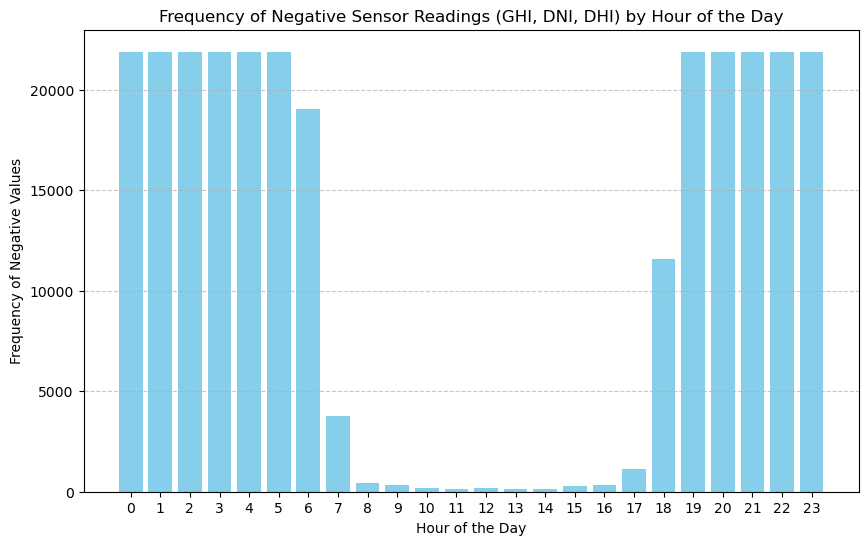

In [63]:
columns_to_check = ['GHI', 'DNI', 'DHI']

# Filter rows with negative values in the specified columns
negative_values_df = benin_df_filtered[benin_df_filtered[columns_to_check].lt(0).any(axis=1)]

# Extract the hour from the timestamp
negative_values_df['Hour'] = negative_values_df.index.hour  # Assuming the timestamp is the index

# Count occurrences of negative values by hour
negative_by_hour = negative_values_df.groupby('Hour').size()

# Plot the frequency of negative values by hour
plt.figure(figsize=(10, 6))
plt.bar(negative_by_hour.index, negative_by_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Negative Values')
plt.title('Frequency of Negative Sensor Readings (GHI, DNI, DHI) by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the histogram above, we observe that negative readings predominantly occur during two distinct periods:

From 12:00 AM (midnight) to 7:00 AM
From 6:00 PM to 11:00 PM
These times align with nighttime hours when solar irradiance should naturally be zero. This indicates that the negative readings likely result from residual heat being emitted by the sensors after prolonged daytime exposure, highlighting a potential calibration issue. To address this, the most logical solution is to replace all negative values with zeros, as this accurately reflects the expected irradiance during nighttime hours.

In [ ]:
bennin_df['GHI'] = bennin_df['GHI'].clip(lower=0)
bennin_df['DNI'] = bennin_df['DNI'].clip(lower=0)
bennin_df['DHI'] = bennin_df['DHI'].clip(lower=0)

## Univariant Analysis

### now lets do some time series analysis for each coumn to see thrends first throught the day then throught the year

C:\Users\Mikias\AppData\Local\Temp\ipykernel_12920\2201286035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin_df_filtered['Hour'] = benin_df_filtered.index.hour


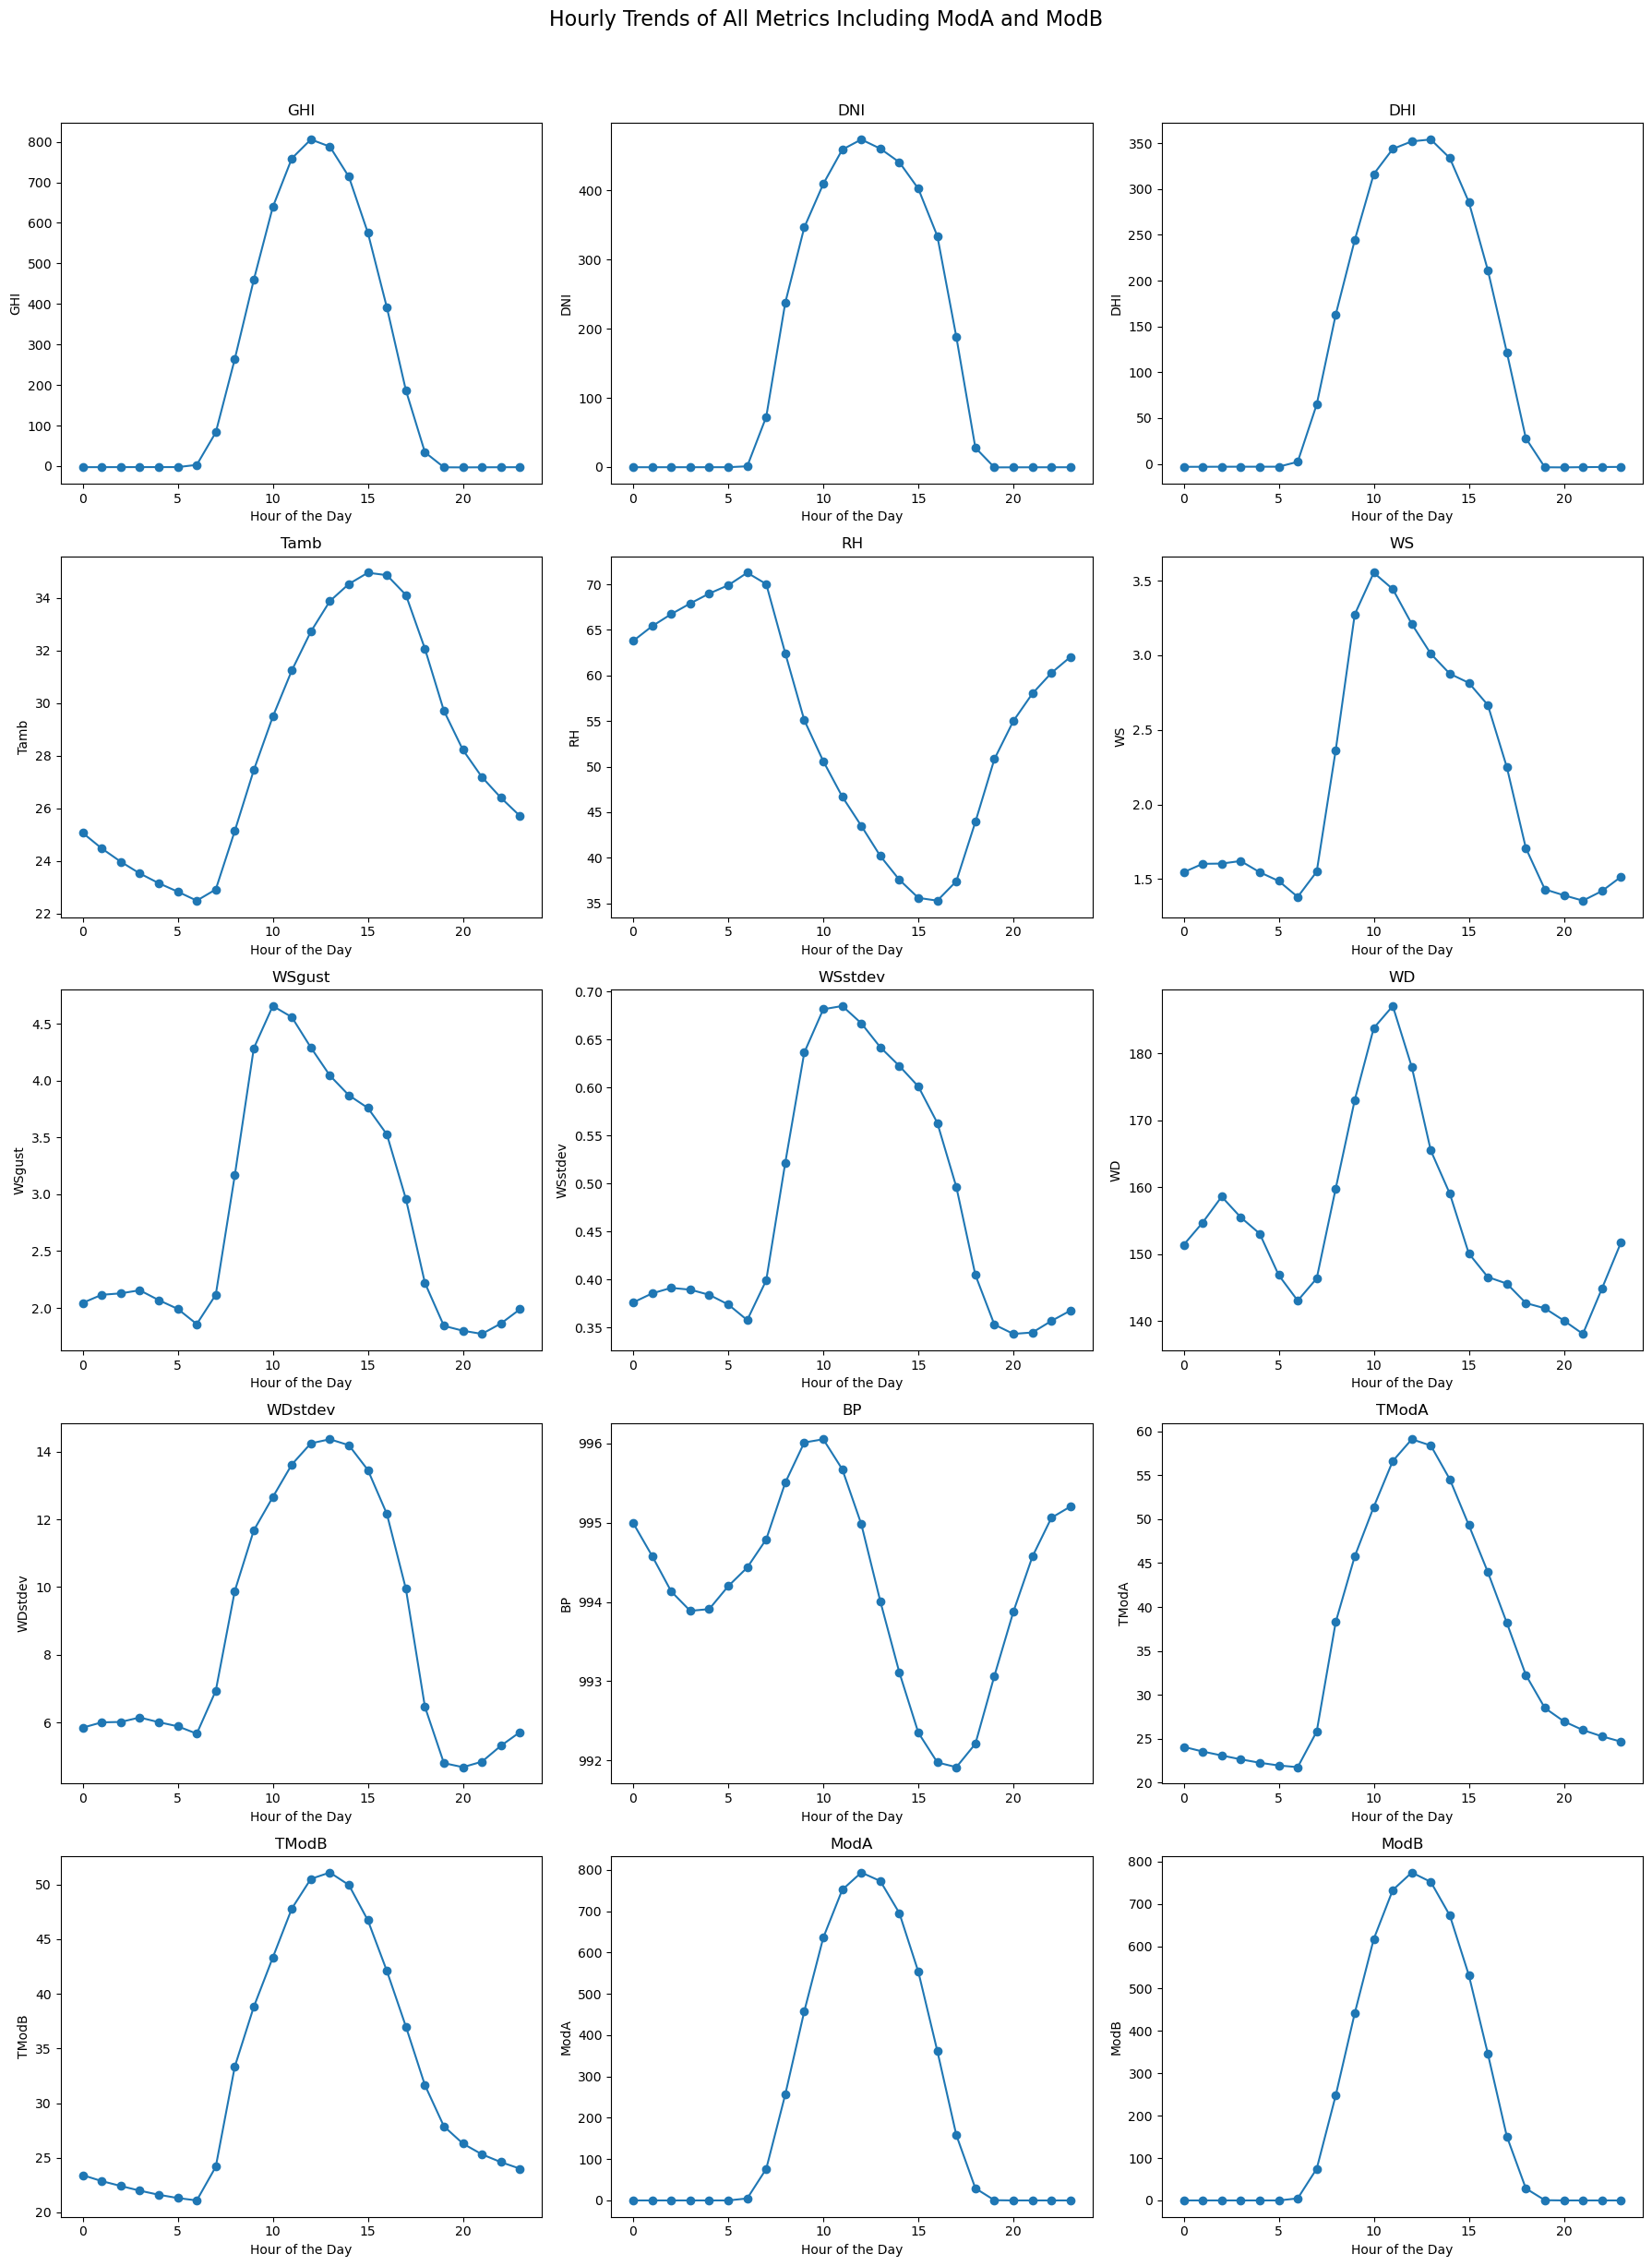

In [66]:
# Extract the hour from the Timestamp index
benin_df_filtered['Hour'] = benin_df_filtered.index.hour

# Group data by 'Hour' and calculate the mean
hourly_data = benin_df_filtered.groupby('Hour').mean()

# Define columns to plot, including ModA and ModB
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 
                   'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB', 'ModA', 'ModB']

# Determine grid size for subplots
total_columns = len(columns_to_plot)
cols = 3  # Number of columns per row in the plot
rows = math.ceil(total_columns / cols)  # Calculate required rows

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
fig.suptitle('Hourly Trends of All Metrics Including ModA and ModB', fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through the columns and create individual plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(hourly_data.index, hourly_data[column], marker='o')
    ax.set_title(column)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel(column)

# Hide any unused subplots (if total columns < grid size)
for j in range(total_columns, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


The line plots above reveal that many features, including `GHI`, `DNI`, `DHI`, `ModA`, `ModB`, and `WDstdev`, exhibit a consistent daily pattern. These patterns typically align with natural solar and environmental cycles. Specifically:

- **Flat Periods (12 AM - 7 AM and 6 PM - 11 PM):** During these hours, these features show minimal or no activity, aligning with nighttime when solar irradiance and related metrics are expected to be near zero.

- **Rise and Peak (7 AM - 12 PM):** From sunrise, these metrics gradually increase, reaching their peak around midday (12 PM). This aligns with the sun being at its highest point in the sky, maximizing irradiance and related parameters.

- **Decline (12 PM - 6 PM):** Post midday, these metrics gradually decrease as the sun sets, returning to minimal levels by evening.

This consistent pattern reflects the daily solar cycle's influence on these environmental metrics. To explore similar trends across a larger timescale, such as months, let us analyze how these metrics behave over the months of the year to identify seasonal variations or trends.

C:\Users\Mikias\AppData\Local\Temp\ipykernel_12920\1039959716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin_df_filtered['Month'] = benin_df_filtered.index.month


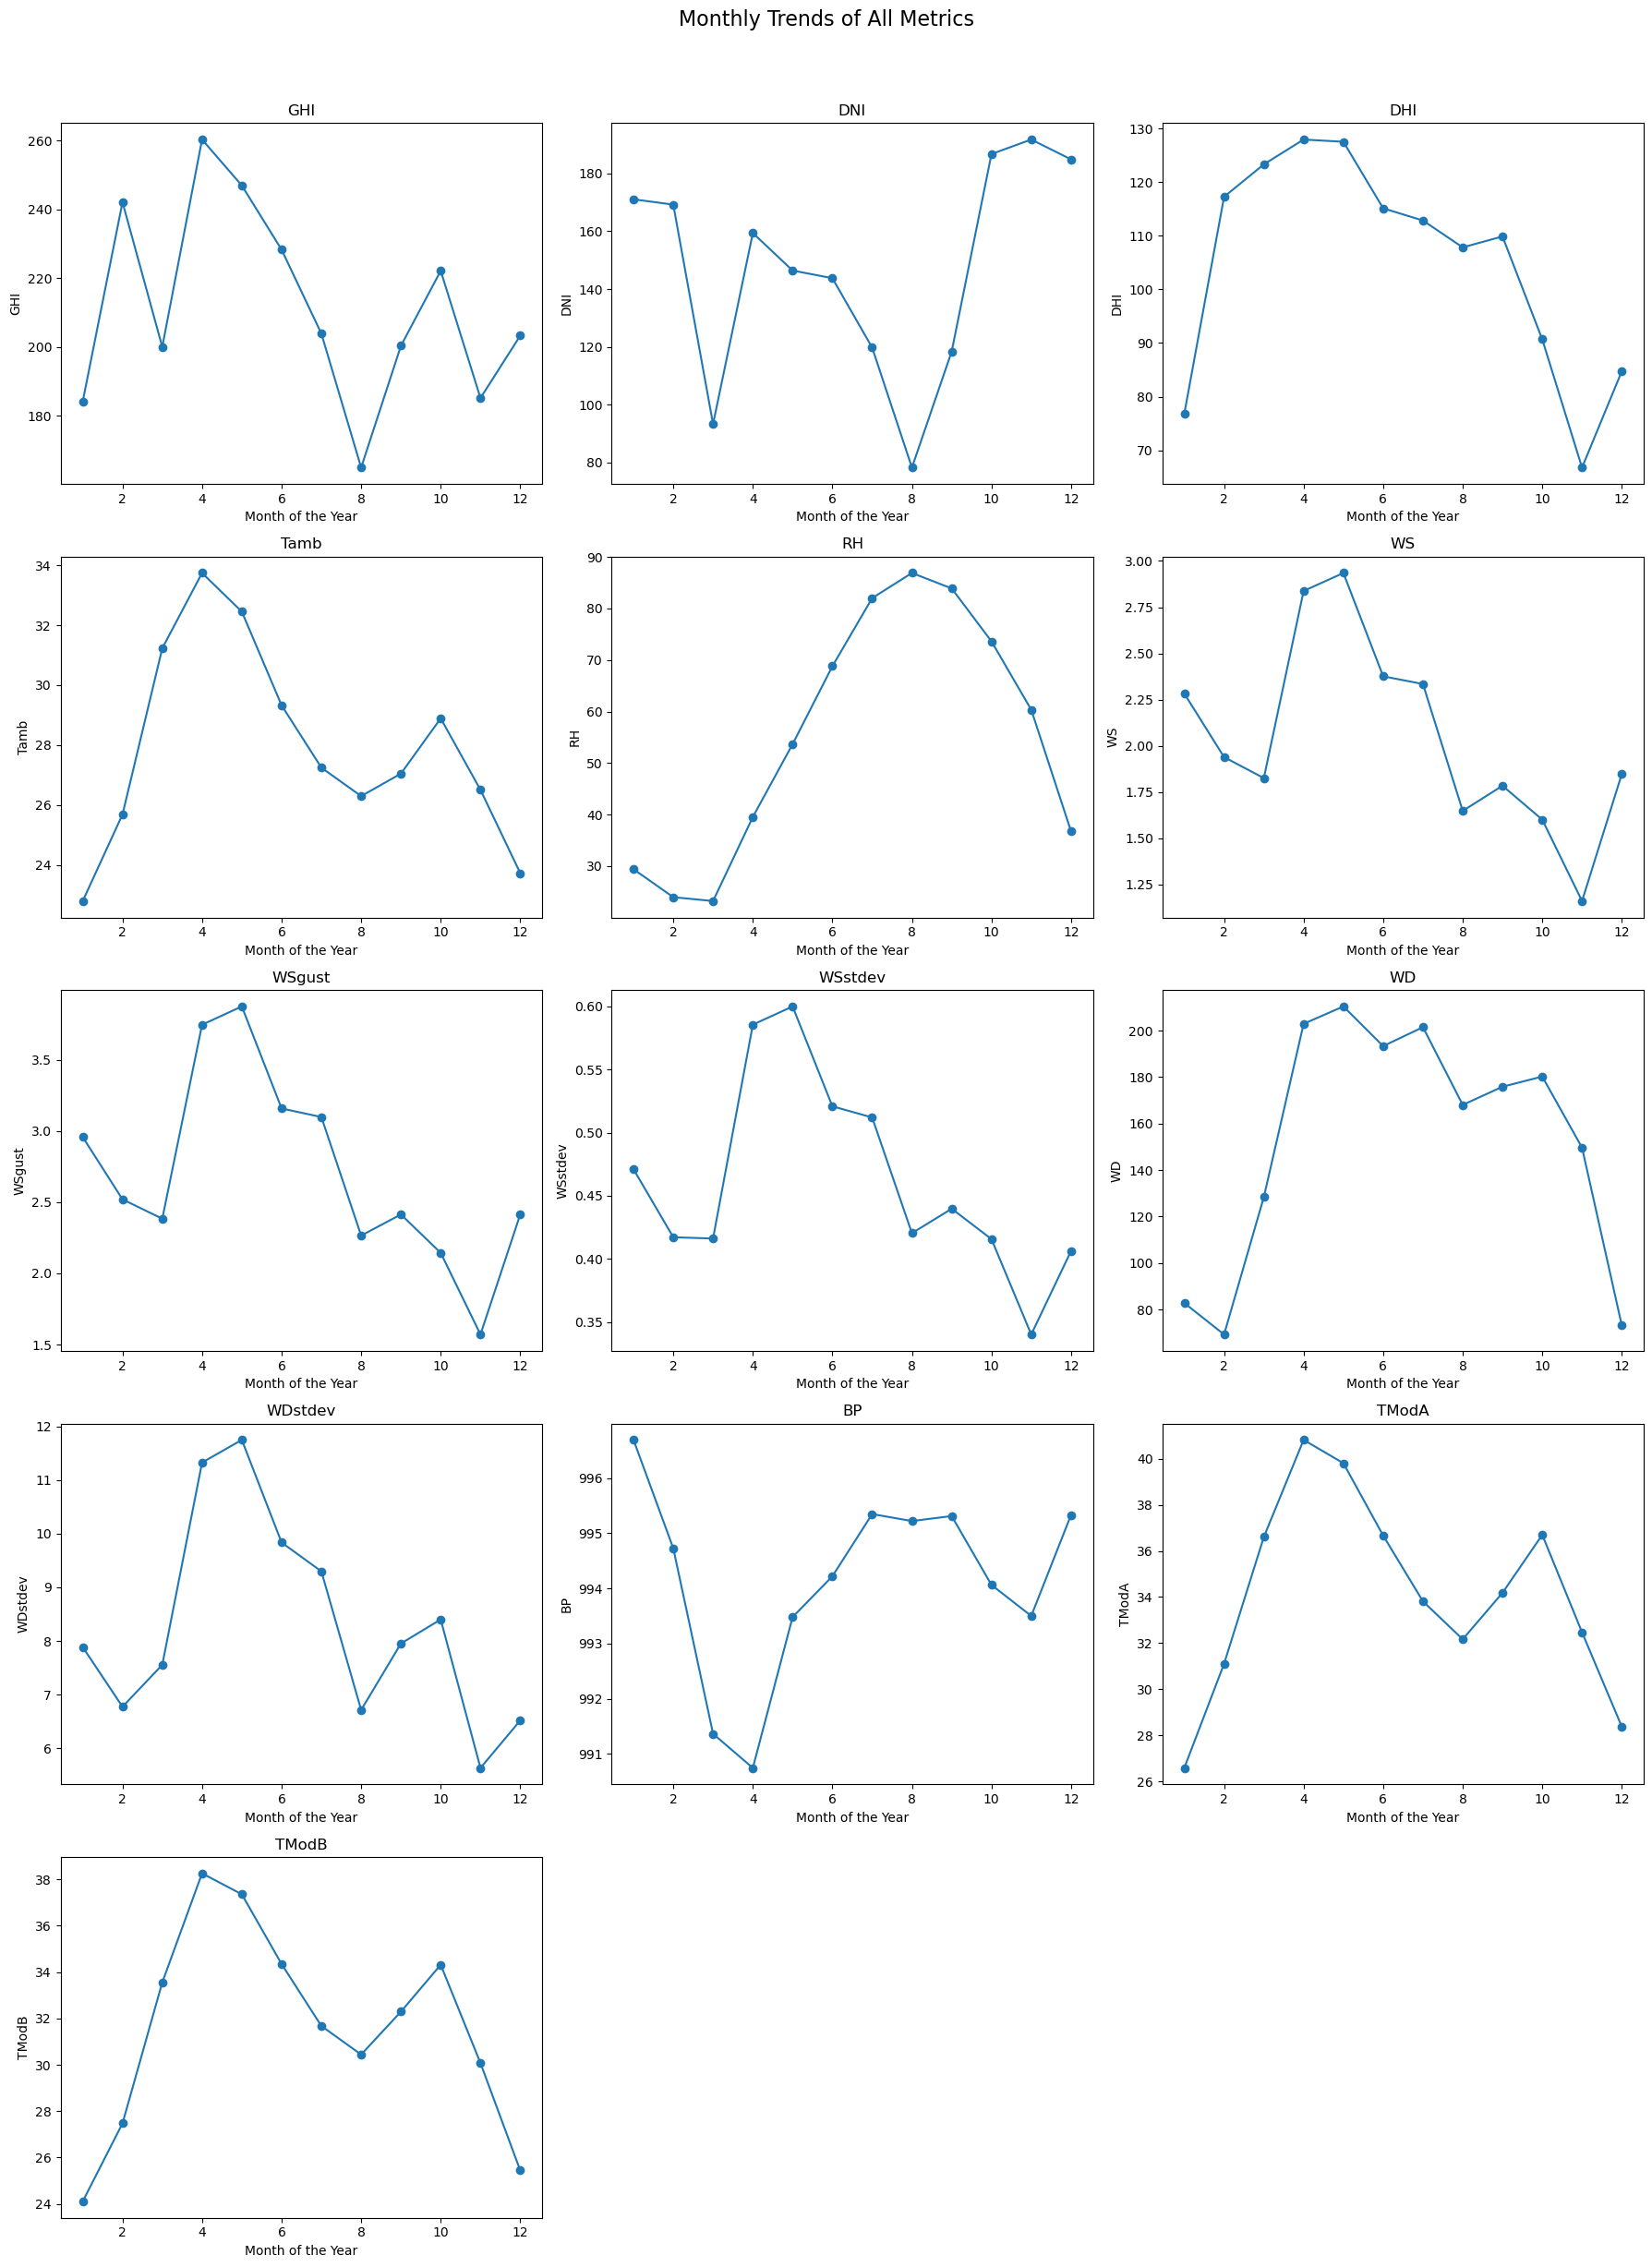

In [67]:
import matplotlib.pyplot as plt
import math

# Extract the month from the Timestamp index
benin_df_filtered['Month'] = benin_df_filtered.index.month

# Group data by 'Month' and calculate the mean
monthly_data = benin_df_filtered.groupby('Month').mean()

# Define columns to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB']

# Determine grid size for subplots
total_columns = len(columns_to_plot)
cols = 3  # Number of columns per row in the plot
rows = math.ceil(total_columns / cols)  # Calculate required rows

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
fig.suptitle('Monthly Trends of All Metrics', fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through the columns and create individual plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(monthly_data.index, monthly_data[column], marker='o')
    ax.set_title(column)
    ax.set_xlabel('Month of the Year')
    ax.set_ylabel(column)

# Hide any unused subplots (if total columns < grid size)
for j in range(total_columns, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


from the above plot we can see different seasonal variations for eg 
  
  
  The DHI (Diffuse Horizontal Irradiance) shows a continuous increase from its lowest reading in January, during the heart of the dry season in Benin, to its highest point in March, as the region transitions into the wet season. This increase is associated with cloud coverage. After reaching its peak in March, DHI gradually decreases from April to December, with some fluctuations in its decline.

On the other hand, DNI (Direct Normal Irradiance) continuously decreases from January to March, during the dry season in Benin, as the region shifts into the transition phase leading to the wet season. From April, DNI starts to increase slightly until it reaches a low point in August, at the peak of the wet season. After this, it gradually increases again towards its peak, completing the seasonal cycle. The decrease in DNI is linked to cloud cover during the wet season.

## Multivariate Analysis

### 1. Correlation Matrix for Solar Radiation and Temperature

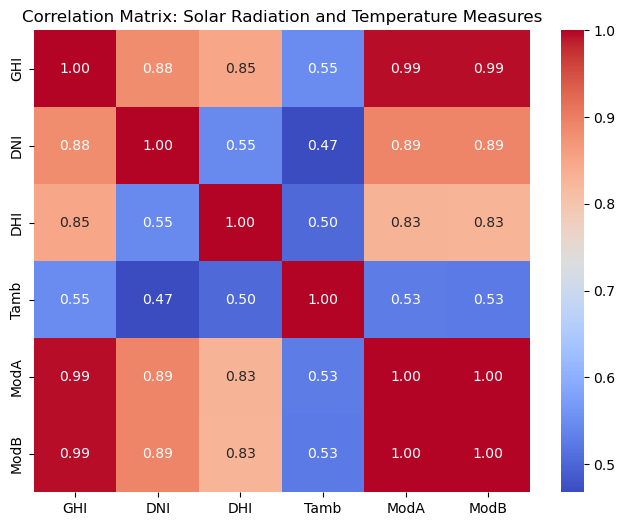

In [72]:
# Correlation matrix for solar radiation and temperature measures
corr_matrix = benin_df[numeric_col].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Solar Radiation and Temperature Measures')
plt.show()

#### Based on the heatmap analysis, we can now identify the correlations that will help us make informed decisions for our business objective: determining a region with high potential for maximizing solar energy farming with long-term sustainability. Specifically, we need to focus on the positive correlations with ModA and ModB readings, as these represent key indicators of the environmental conditions conducive to solar energy production. By identifying the variables that exhibit strong positive correlations with ModA and ModB, we can pinpoint the factors that are most likely to drive efficient and sustainable solar energy generation in the region. 
### Here are the columns/features that have postivie correlation with ModA and ModB:
       DHI (0.83 with ModA & 0.83 with ModB )
       DNI (0.89 with ModA & 0.89 with ModB)
       GHI (0.99 with ModA & 0.99 with ModB)
